## ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Convolutional Neural Networks



**By the end of the lesson, you should be able to:**
- Identify use cases for convolutional neural networks and when they are superior to other neural networks.
- Describe convolutional and pooling layers.
- Define padding and filters.
- Fit CNNs in Keras.
- Understand how edge detection works in CNNs. _(optional)_

Convolutional neural networks are generally used when we are dealing with image data.

Their main advantage over densely connected neural networks is **efficiency**.

In order to illustrate this, let's build out a feedforward neural network and tackle the MNIST Handwritten Digits Dataset.

**How are images represented in computer**


`rgb`

- by using pixels, many small dots, classify by the color (color - RGB) (0 to 256 RED)
- pixel value for all pixels 
- 3 layers, 3 numbers (R layer G layer B layer)

`black white` - dont need 3 channel - use grayscale channel 

0 (white) - 256 (VERY BLACK)


**How do we fit in these matrix**
1) completely naive - feedforward fully connected neural netwrok
- we peel each column and stack into one major column 
- problem --> first hidden layers contains many nodes 

`Convolution`
- pre-determined filters are used for image for enhancement purposes - edge detection 
- spatial property of the image, use smaller parts of the image to reduce the amount of parameters we need to use 
- pooling 
- smaller convolutions that detects slight hori or verti lines or circle 
- slowly will piece out different convulations then forming final shape to tell something 


**Details** 
1) `padding` --> helps to increase the number of times the edges can be calculated by the filter 


2) `'same' convolution` means making same size convolution from the inpurt layer --> better result 

3) `Stride` - how far you step away from the original box --> if 3, means u skip 3 steps to the right. 


`how we determine the neural network` - we only touch the architecture 
- 4 convolutions in each row - determine the size 

across rbg - apply filters 3 times for each RGB -- > then apply either (max, avg, sum) across 3 layers of 4x4 --> to become one dimension 4x4 

we got many convolution -- to detect `hori`, `verti`, `circular` 

pooling layer - no wiehgts are learnt - result to lower dimension of layer - no parameters to learn

max pooling - lower resolution - thus faster computation 
we dont need alot of resolution as it will cause huge variance - cannot tell unseen data


In [1]:
# #to disable GPU
# import os, datetime
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [2]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.1.0
Keras Version: 2.2.4-tf

Python 3.7.13 (default, Mar 28 2022, 08:03:21) [MSC v.1916 64 bit (AMD64)]
Pandas 1.3.4
Scikit-Learn 1.0.2
GPU is available


In [3]:
# Import libraries and modules
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Check one value of X_train.
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
# Check shape of an image.
X_train[0].shape

(28, 28)

##### We want to scale our data to be betwen 0 and 1.

When working with image data, we commonly scale it to be between 0 and 1. This is a common choice if we are pulling images from various sources that are on a different scale, and can improve speed by keeping values close to 0. Depending on the type of computation you want to do, having pixel values represented with `255` might not be ideal.

In [6]:
# Make sure each value is a float. (Otherwise, we get an error.)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# The current range of X_train and X_test is 0 to 255.
# The code below is equivalent to X_train = X_train / 255.
# This scales each value to be between 0 and 1.
X_train /= 255
X_test /= 255

<img src="../images/picture.png" alt="drawing" width="400"/>

[Image by 3Blue1Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw)

In [7]:
# Check shape of full training data.
X_train.shape

(60000, 28, 28)

In [8]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

`gray` should be 28,28,1

`rgb` 28,28,3



##### We want to reshape each image to be 28 x 28 x 1.

This allows our neural network to know that there's only one value (how dark the pixel is) instead of multiple values per pixel. For example, a color image stored in RGB (red/green/blue) might have shape 28 x 28 x 3, where one value is corresponds to how red the pixel is, one value corresponds to how blue the pixel is, and one value corresponds to how green the pixel is.
- Reshaping your images can be a hard part of pre-processing.

In [9]:
X_train.shape[0]

60000

In [10]:
# Reshape each image to be 28 x 28 x 1.
# The 1 corresponds to the one black/white value.
# If we had a color image, we would likely use 3 for RGB.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Now let's check out `y_train`.

In [11]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

<details><summary>What change do I need to make to y_train? Why?</summary>

- Right now, the values of `y_train` will be interpreted as a number. Our neural network would try to predict values that are numerically close to the true value. (i.e. If $Y = 5$, then $\hat{Y} = 4$ would be way better than $\hat{Y} = 1$. **This isn't actually what we want!**
- I need to convert it to a categorical variable.
</details>

In [12]:
# Change y_train.
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [13]:
# Check y_train.
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Let's fit a feedforward neural network to this data.

In [14]:
# When instantiating our model, what do we first write?

model = Sequential()

<img src="../images/flattening_image.png" alt="drawing" width="500"/>

[Image source.](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png)

In [15]:
# In order to "align" our neurons in a vertical array, we
# add a "Flatten" layer. This will be required before adding
# subsequent Dense layers. We need to specify the input shape.

model.add(Flatten(input_shape=(28, 28, 1)))

<img src="../images/picture.png" alt="drawing" width="400"/>

<img src="../images/network.png" alt="drawing" width="400"/>

[Images by 3Blue1Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw)

In [16]:
# Let's create a fully-connected, feed-forward neural net with:
# - A 128-node hidden layer.
# - A 32-node hidden layer.
# - The appropriate output layer.

model.add(Dense(128, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [17]:
# Compile model.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
# Fit model on training data.
history = model.fit(X_train,
                    y_train, 
                    batch_size=256,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.4600 - accuracy: 0.8753 - val_loss: 0.2022 - val_accuracy: 0.9416
Epoch 2/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1779 - accuracy: 0.9490 - val_loss: 0.1509 - val_accuracy: 0.9551
Epoch 3/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1300 - accuracy: 0.9630 - val_loss: 0.1166 - val_accuracy: 0.9660
Epoch 4/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.1036 - accuracy: 0.9693 - val_loss: 0.1069 - val_accuracy: 0.9681
Epoch 5/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0836 - accuracy: 0.9760 - val_loss: 0.0923 - val_accuracy: 0.9718
Epoch 6/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0691 - accuracy: 0.9799 - val_loss: 0.0880 - val_accuracy: 0.9727
Epoch 7/10
60000/60000 [==============================] 

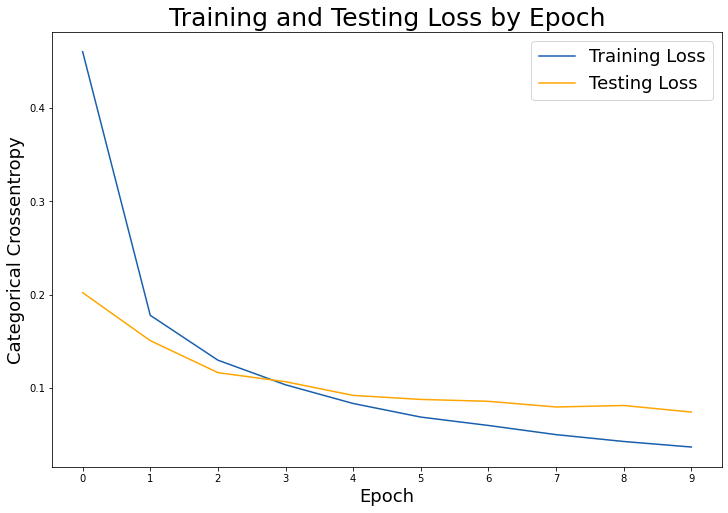

In [19]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(np.arange(10), np.arange(10))

plt.legend(fontsize = 18);

<details><summary>If my model were to be underfit, what might I do?</summary>

- I could try decreasing the batch size.
- I could try increasing the number of epochs.
- I could try increasing the number of layers.
- I could try increasing the number of nodes in each layer.
</details>

In [20]:
# Evaluate model on test data.
score = model.evaluate(X_test,
                       y_test,
                       verbose=1)

labels = model.metrics_names

10000/10000 [==============================] - 0s 50us/sample - loss: 0.0744 - accuracy: 0.9778


In [21]:
# Show model performance.
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')

loss: 0.07444115346133476
accuracy: 0.9778000116348267


<details><summary>How many parameters are being fit in this model?</summary>

- In our input layer, we have $28 * 28 = 784$ neurons.
- In our first hidden layer, we have $64$ neurons.
- In our second hidden layer, we have $32$ neurons.
- In our output layer, we have $10$ neurons.
- There is one bias value for each neuron in every hidden layer and output layer, which is $128 + 32 + 10 = 170$ bias parameters.
- There is one weight value connecting each node from the input to first hidden layer, which is $784 * 128 = 100,352$ weight parameters.
- There is one weight value connecting each node from the first hidden layer to the second hidden layer, which is $128 * 32 = 4,096$ weight parameters.
- There is one weight value connecting each node from the second hidden layer to the output layer, which is $32 * 10 = 320$ weight parameters.
- Adding these up, we get $170 + 100,352 + 4,096 + 320 \approx 105,000$ parameters.
</details>

In [22]:
# Check out the model summary.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


<details><summary>What are some consequences of fitting a model with too many parameters?</summary>

- Easy to overfit our model.
- Learning is quite slow.
- We need more data in order to meaningfully learn and fit a model!
</details>

## Convolutional Neural Networks
Convolutional neural networks are a great way to get around this issue of too many parameters. CNNs do some complicated math up front to "compress our images," allowing us to learn far fewer parameters in later layers.

A CNN will generally consist of three types of layers:
- Convolutional Layer
- Pooling Layer
- Densely Connected Layer

<img src="../images/cnn.jpeg" alt="drawing" width="600"/>

[Image source.](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

This isn't overly helpful if we're trying to learn what CNNs are/do.

### Let's fit a convolutional neural network to this data.

In [23]:
# Instantiate a CNN.
cnn_model = Sequential()

In [24]:
# Add a convolutional layer.

cnn_model.add(Conv2D(filters=6,            # number of filters - one picture, 6 convulations behind each other
                     kernel_size=(3, 3),        # height/width of filter
                     activation='relu',      # activation function 
                     input_shape=(28, 28, 1))) # shape of input (image)

We have to specify the input shape in our first cell, just like we had to do earlier!

In [25]:
cnn_model.add(MaxPooling2D(pool_size=(2, 2))) # dimensions of region of pooling

In [26]:
cnn_model.add(Conv2D(16,
                     kernel_size = (3, 3),
                     activation='relu'))

In [27]:
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

In [28]:
cnn_model.add(Flatten())

<img src="../images/pic1.png" alt="drawing" width="400"/>

<img src="../images/pic2.png" alt="drawing" width="400"/>

<img src="../images/pic3.png" alt="drawing" width="400"/>

<img src="../images/pic4.png" alt="drawing" width="400"/>

[Image by 3Blue1Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw)

In [29]:
# Add a densely-connected layer with 128 neurons.
cnn_model.add(Dense(128, activation='relu'))

In [30]:
# Add a final layer with 10 neurons.
cnn_model.add(Dense(10, activation='softmax'))

In [31]:
# Compile model
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [39]:
# Fit model on training data
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=256,
                        validation_data=(X_test, y_test),
                        epochs=10,
                        verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.4616 - accuracy: 0.8786 - val_loss: 0.1453 - val_accuracy: 0.9588
Epoch 2/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.1201 - accuracy: 0.9643 - val_loss: 0.0830 - val_accuracy: 0.9748
Epoch 3/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0845 - accuracy: 0.9746 - val_loss: 0.0616 - val_accuracy: 0.9803
Epoch 4/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0671 - accuracy: 0.9798 - val_loss: 0.0504 - val_accuracy: 0.9838
Epoch 5/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0562 - accuracy: 0.9830 - val_loss: 0.0475 - val_accuracy: 0.9842
Epoch 6/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0492 - accuracy: 0.9849 - val_loss: 0.0427 - val_accuracy: 0.9865
Epoch 7/10
60000/60000 [==============================] 

In [32]:
# Check out the model summary.
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

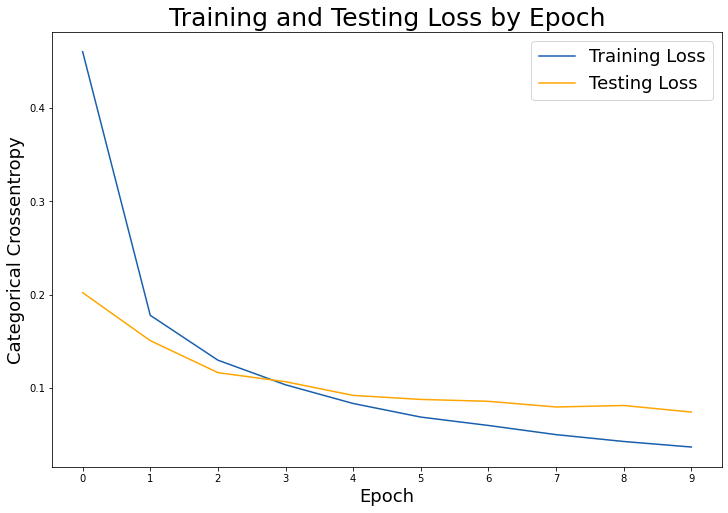

In [33]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_labels = history.epoch

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=18);

In [34]:
# Evaluate model on test data.
cnn_score = cnn_model.evaluate(X_test,
                               y_test,
                               verbose=1)

cnn_labels = cnn_model.metrics_names

10000/10000 [==============================] - 2s 190us/sample - loss: 2.3150 - accuracy: 0.0469


In [35]:
# Compare CNN and FFNN models.
print(f'CNN {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN {cnn_labels[1]}   : {cnn_score[1]}')
print()
print(f'FFNN {labels[0]} : {score[0]}')
print(f'FFNN {labels[1]}  : {score[1]}')

CNN loss  : 2.315017008972168
CNN accuracy   : 0.04690000042319298

FFNN loss : 0.07444115346133476
FFNN accuracy  : 0.9778000116348267


### Convolution Layer

The convolution layer is where we pass a filter over an image and do some calculation at each step. Specifically, we take pixels that are close to one another, then summarize them with one number. The goal of the convolution layer is to identify important features in our images, like edges.

<img src="../images/convolution.gif" alt="drawing" width="550"/>

[Image source.](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/)

Our hyperparameters here are:
- the number of filters to use. This is given by `filters = 6` in our example: six filters.
- the dimensions of the filter. This is given by `kernel_size = 3` in our example: a 3x3 filter.

**How many filters should we use?** Well, this is a hyperparameter. There's not one great answer, but the idea is that each filter can detect one type of feature in an image (like vertical edges). This may depend on the complexity of your images (simpler images require fewer filters) and usually requires trial and error to identify an adequate value of `filters`. [Source](https://stats.stackexchange.com/questions/196646/what-is-the-significance-of-the-number-of-convolution-filters-in-a-convolutional)

#### Padding

When we pass a filter over an image, each of the "inside" pixels is counted pretty frequently and thus gets "represented" more in the final model output.

<details><summary>How many times does each corner get included in the "output?"</summary>

- Right now, each corner gets included only once.
</details>

We can use **padding** to add a border of white cells around the edge of the image. This will allow pixels on the edge/in the corner to be included more frequently. (This might be good when doing computer vision for self-driving vehicles!)

<details><summary>In this MNIST digits case, do you think padding is a good idea or a bad idea?</summary>

- Padding is probably a bad idea here. We're increasing the number of parameters we need to learn, but it's unlikely that we're getting important data from the corners/edges of the image. 
</details>

[Let's visualize what the convolution operation looks like](https://ezyang.github.io/convolution-visualizer/).

### Pooling Layer

Remember that CNNs learn far fewer parameters than a regular feed-forward neural network. Most of the "parameter reduction" comes from the pooling layer.

<img src="../images/maxpool.png" alt="drawing" width="400"/>

[Image source.](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/)

In Max Pooling, we pass a filter over an image. At each step, we take the maximum value and record it as part of the output.
- Average Pooling exists, but is far less frequently used. [Andrew Ng](https://www.deeplearning.ai/deep-learning-specialization/) recommends using Max Pooling.
- When pooling, we generally partition the result from the previous layer. That is, the filter does not usually overlap like it does in the convolutional layer.

Our hyperparameters here are the **dimensions of the filter we use when pooling**. This is given by `pool_size = (2, 2)` in our example.

##### Why use max pooling?
1. Reduces the data dimensionality.
2. Protects against overfitting by creating a more abstract representation.
3. Provides some invariance by ignoring insignificant local changes in the image.

### Densely-Connected Layer
The densely-connected layer is the exact same as in a normal feed-forward neural network, so we won't spend any time talking about that, **except: remember to pass a `Flatten()` layer before a `Dense()` layer!**

In [36]:
# Instantiate a CNN.
cnn_model_2 = Sequential()

# Add a convolutional layer.
cnn_model_2.add(Conv2D(filters=16,             # number of filters
                       kernel_size=(3,3),      # height/width of filter
                       activation='relu',      # activation function 
                       input_shape=(28,28,1))) # shape of input (image)

# Add a pooling layer.
cnn_model_2.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

# Add another convolutional layer.
cnn_model_2.add(Conv2D(64,
                       kernel_size=(3,3),
                       activation='relu'))

# Add another pooling layer.
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))

# We have to remember to flatten to go from the "box" to the vertical line of nodes!
cnn_model_2.add(Flatten())

# Add a densely-connected layer with 64 neurons.
cnn_model_2.add(Dense(64, activation='relu'))

# Let's try to avoid overfitting!
cnn_model_2.add(Dropout(0.5))

# Add a densely-connected layer with 32 neurons.
cnn_model_2.add(Dense(32, activation='relu'))

# Let's try to avoid overfitting!
cnn_model_2.add(Dropout(0.5))

# Add a final layer with 10 neurons.
cnn_model_2.add(Dense(10, activation='softmax'))

# Compile model
cnn_model_2.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

# Fit model on training data
history = cnn_model_2.fit(X_train,
                          y_train,
                          batch_size=128,
                          validation_data=(X_test, y_test),
                          epochs=10,
                          verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.9433 - accuracy: 0.6767 - val_loss: 0.1274 - val_accuracy: 0.9664
Epoch 2/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.4334 - accuracy: 0.8619 - val_loss: 0.0751 - val_accuracy: 0.9786
Epoch 3/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3422 - accuracy: 0.8916 - val_loss: 0.0664 - val_accuracy: 0.9826
Epoch 4/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3041 - accuracy: 0.9038 - val_loss: 0.0494 - val_accuracy: 0.9861
Epoch 5/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2700 - accuracy: 0.9129 - val_loss: 0.0595 - val_accuracy: 0.9852
Epoch 6/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2517 - accuracy: 0.9176 - val_loss: 0.0495 - val_accuracy: 0.9871
Epoch 7/10
60000/60000 [==============================] 

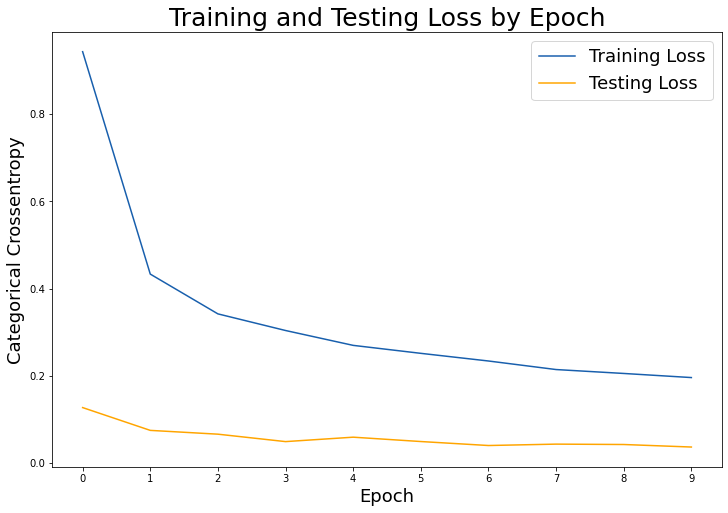

In [37]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_labels = history.epoch

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=18);

In [38]:
# Evaluate model on test data.
cnn_2_score = cnn_model_2.evaluate(X_test,
                                   y_test,
                                   verbose=1)

cnn_2_labels = cnn_model_2.metrics_names

# Compare models.
print(f'CNN 2 {cnn_2_labels[0]}  : {cnn_2_score[0]}')
print(f'CNN 2 {cnn_2_labels[1]}   : {cnn_2_score[1]}')
print()
print(f'CNN 1 {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN 1 {cnn_labels[1]}   : {cnn_score[1]}')
print()
print(f'FFNN {labels[0]} : {score[0]}')
print(f'FFNN {labels[1]}  : {score[1]}')

cnn_model_2.summary()

10000/10000 [==============================] - 1s 62us/sample - loss: 0.0369 - accuracy: 0.9896
CNN 2 loss  : 0.03691784655022341
CNN 2 accuracy   : 0.9896000027656555

CNN 1 loss  : 2.315017008972168
CNN 1 accuracy   : 0.04690000042319298

FFNN loss : 0.07444115346133476
FFNN accuracy  : 0.9778000116348267
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2

## Conclusion

Convolutional neural networks are uniquely suited to tackle image data.
- Dealing with images usually presents high-dimensional challenges. (A 28x28 image is a pretty low-resolution image.)

<details><summary>Why are convolutional neural networks better equipped to handle image data than non-CNNs?
</summary>

- CNNs are naturally set up to consider interactions among "close pixels" only and can drastically cuts down the number of parameters needed to learn. (Or get better performance for a given number of parameters!)
</details>

<details><summary>Can you think of other situations (i.e. not images) in which we might apply a convolutional neural network?</summary>

- **Videos**. A video is really just a sequence of pictures, so we might use a 3D convolutional neural network. (Length of the picture, width of the picture, and depth of the picture is time.)
- **Time series data**. Rather than passing a filter over neighboring pixels in pictures, what if we passed a filter over neighboring time periods in time series data?
- **Natural language data**. Rather than passing a filter over neighboring pixels in pictures, what if we passed a filter over neighboring words or tokens in natural language data?
- Convolutional neural networks exploit the inherent structure in data we pass in.
</details>